# Lab | Random variable distributions

### 1.Get the numerical variables from our dataset.

In [2]:
# Importing the necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import scipy.stats as stats
from scipy.stats import boxcox 

pd.set_option('display.max_columns', None)

In [3]:
# Load the csv into dataframe

customer_df=pd.read_csv("we_fn_use_c_marketing_customer_value_analysis.csv", sep=",")
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
# Checking the dimensions of data
customer_df.shape

(9134, 24)

In [5]:
# Checking insights of data
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [6]:
# Checking for nan/null values 
customer_df.isna().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [7]:
# checking data columns
customer_df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [8]:
# Standardizing column header names
customer_df.columns = [customer_df.columns[i].lower().replace(' ','_') for i in range(len(customer_df.columns))]

In [9]:
#Checking data columns after standardization
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [10]:
# converting effective_to_date column from object to datetime format

customer_df['effective_to_date'] = customer_df['effective_to_date'].astype('datetime64[ns]')

In [11]:
# Dropping "customer" column because any ID variable is unique and it is not contributing anything to our target column
customer_df=customer_df.drop(["customer"], axis=1)

In [12]:
# Extracting numerical variables

numericals_df = customer_df[customer_df.select_dtypes("number").columns]

In [13]:
numericals_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


### 2.Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.

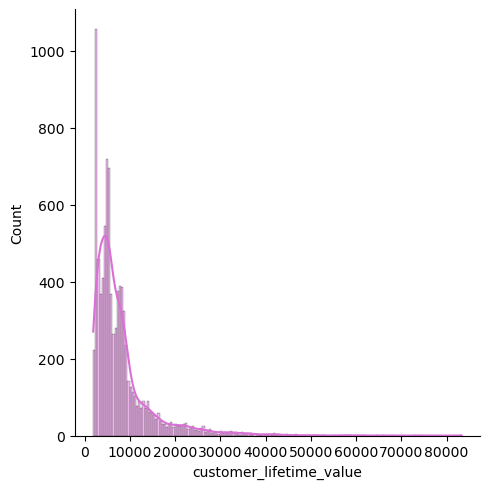

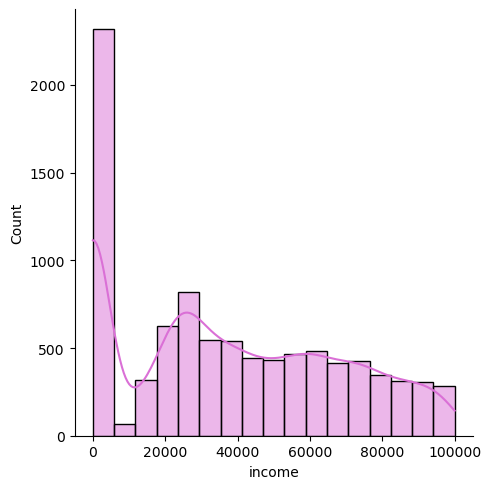

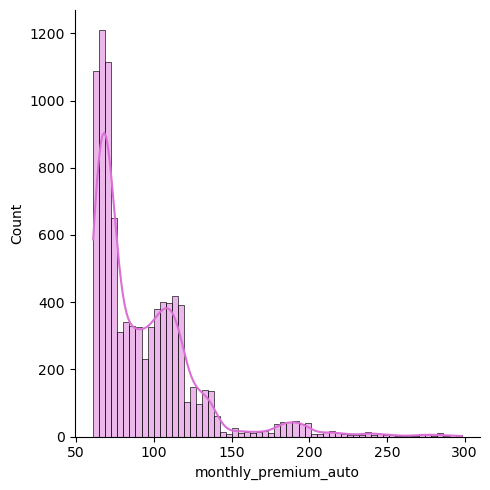

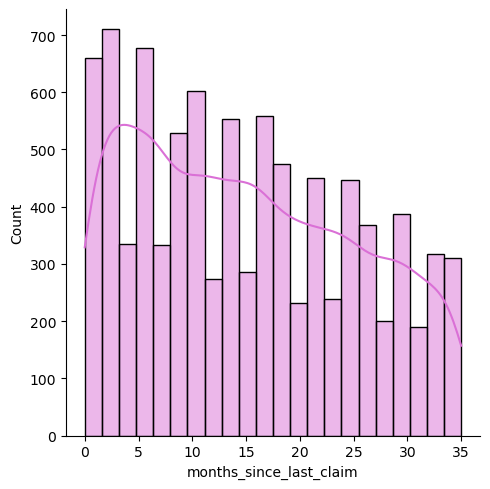

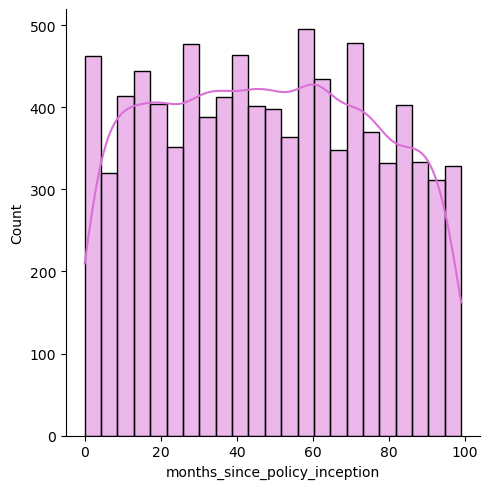

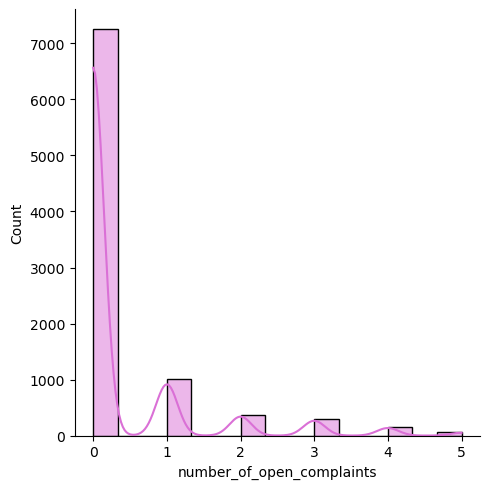

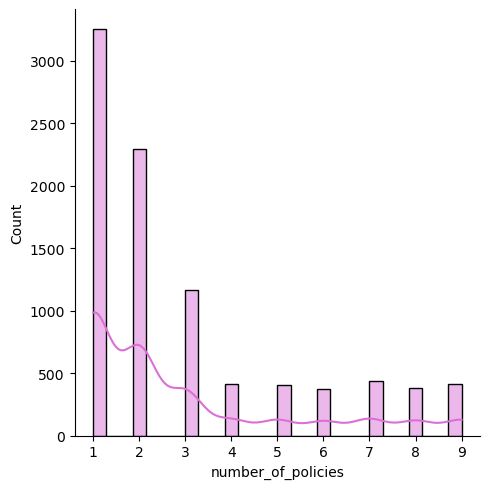

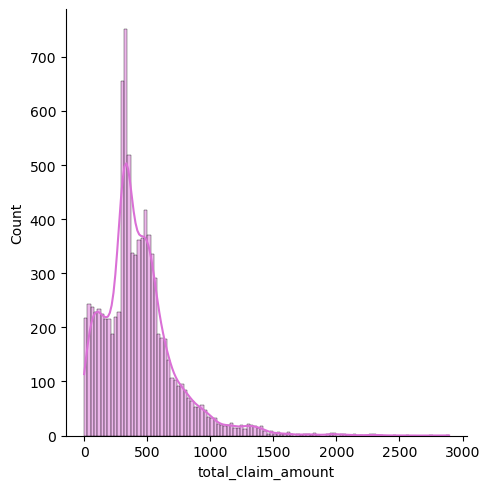

In [14]:
# Checking distribution of numerical columns
for column in numericals_df.columns:
    sns.displot(numericals_df[column], kde = True, color='orchid')  # takes to see the distribution
    plt.show()

### 3.Check if any of the transformations (log-transform, etc.) 

we have seen up to this point changes the result.

#### 3.1 Box-Cox Transormation

In [15]:
# making a copy of original numerical dataframe to apply box-cox tranformation

num_bx = numericals_df.copy()

In [16]:
num_bx.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [17]:
#function to apply box cox tranformation

def boxcox_transform(df):
    numeric_cols = num_bx.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        # since any columns should take negative numbers, to avoid -inf in data
        num_bx[column] = np.where(num_bx[column]<=0, np.NAN, num_bx[column]) 
        num_bx[column] = num_bx[column].fillna(num_bx[column].mean())
        transformed_data, ci = stats.boxcox(num_bx[column])
        num_bx[column] = transformed_data
        _ci[column] = [ci] 
    return df, _ci

# applying a boxcox tranformation on data
num_bx, _ci = boxcox_transform(num_bx)
num_bx.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2.703839,1247.937066,0.685347,10.876059,3.017887,0.648045,0.000000,33.035752
1,2.754926,1167.961720,0.685871,5.808248,18.780377,0.648045,1.424359,56.357614
2,2.780772,1144.063081,0.686039,7.347815,17.389171,0.648045,0.607328,40.071789
3,2.759125,1167.961720,0.686018,7.347815,26.160800,0.648045,1.363462,38.763252
4,2.704995,1072.375744,0.685461,5.471294,19.461641,0.648045,0.000000,19.560154


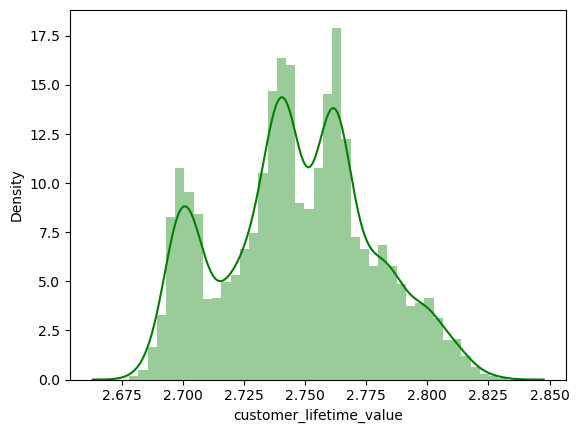

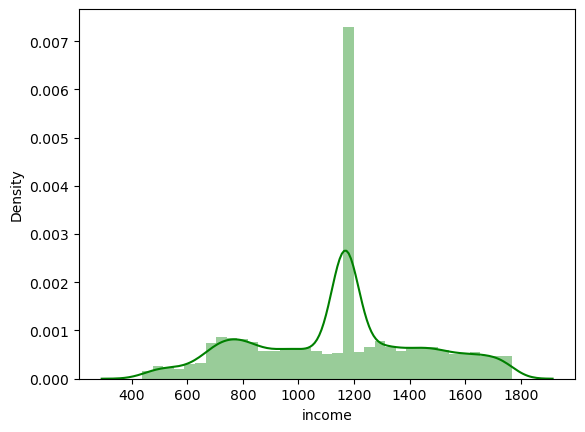

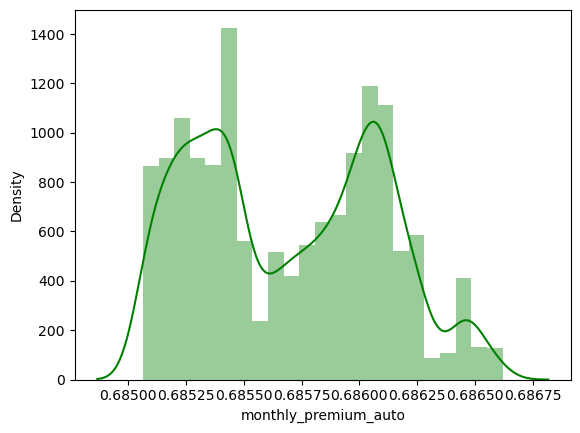

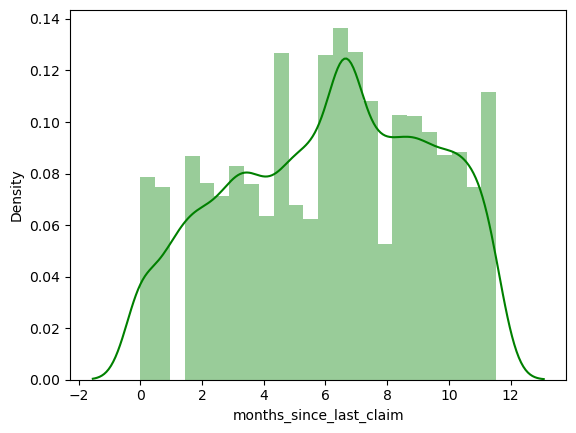

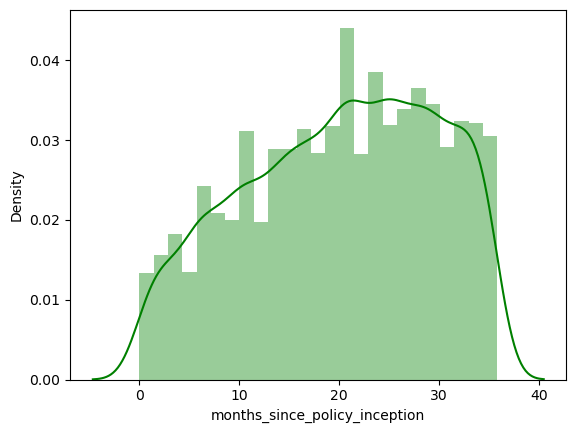

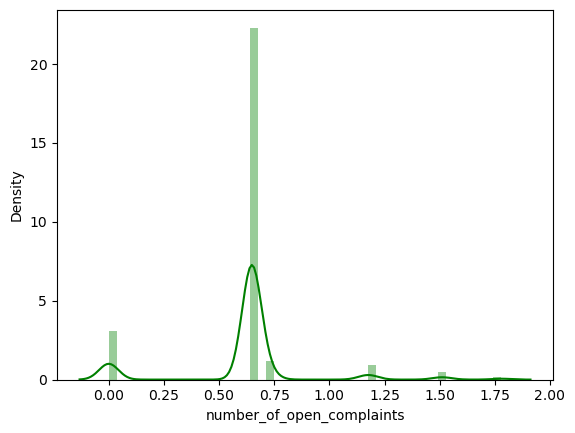

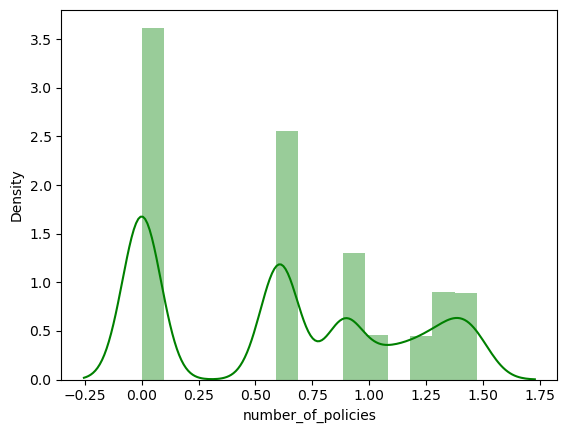

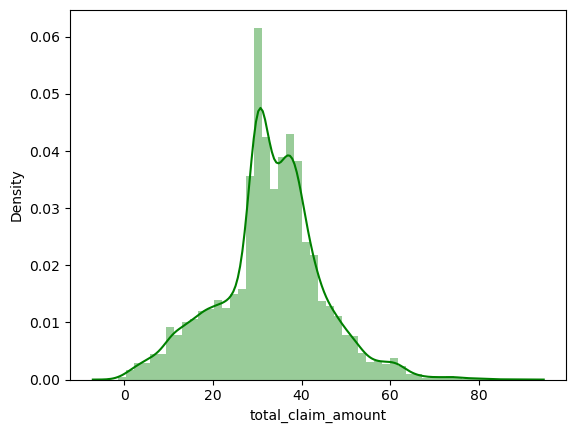

In [18]:
# Checking for distribution after box-cox tranformation

for column in num_bx.columns:
    sns.distplot(num_bx[column], kde=True, color = 'green')
    plt.show()

#### 3.2 Log Transormation

In [30]:
# making a copy of original numerical dataframe to apply log tranformation

num_log = numericals_df.copy()

In [31]:
num_log.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [37]:
# Applaying log transformation on data

num_log_trans = np.log(num_log.replace(0, np.nan))

In [38]:
num_log_trans.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,7.924260,10.937988,4.234107,3.465736,1.609438,NaN,0.000000,5.952753
1,8.850738,NaN,4.543295,2.564949,3.737670,NaN,2.079442,7.031268
2,9.464008,10.794809,4.682131,2.890372,3.637586,NaN,0.693147,6.339428
3,8.941920,NaN,4.663439,2.890372,4.174387,NaN,1.945910,6.272653
4,7.942253,10.688211,4.290459,2.484907,3.784190,NaN,0.000000,4.928202


In [39]:
# Replacing nan values back to 0

num_log_trans = num_log_trans.replace(np.nan,0)

In [41]:
num_log_trans.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,7.924260,10.937988,4.234107,3.465736,1.609438,0.0,0.000000,5.952753
1,8.850738,0.000000,4.543295,2.564949,3.737670,0.0,2.079442,7.031268
2,9.464008,10.794809,4.682131,2.890372,3.637586,0.0,0.693147,6.339428
3,8.941920,0.000000,4.663439,2.890372,4.174387,0.0,1.945910,6.272653
4,7.942253,10.688211,4.290459,2.484907,3.784190,0.0,0.000000,4.928202


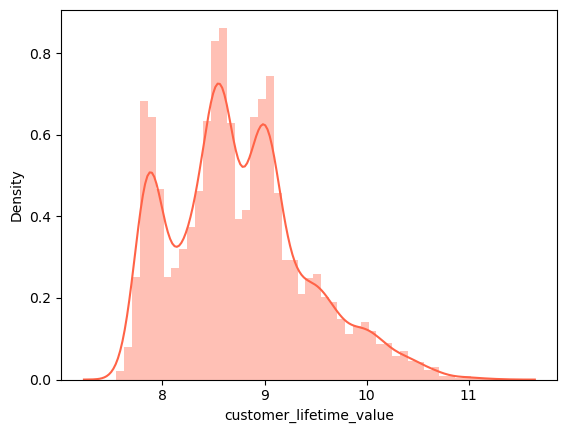

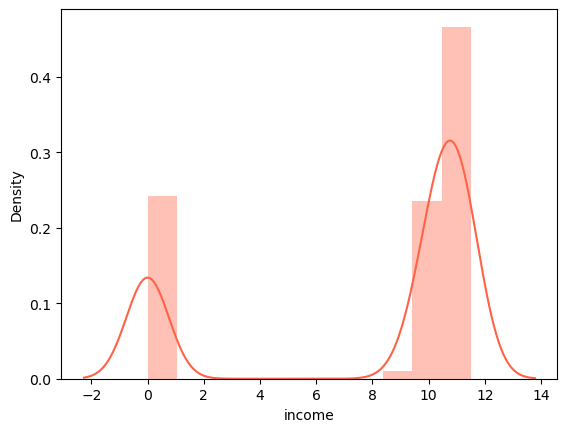

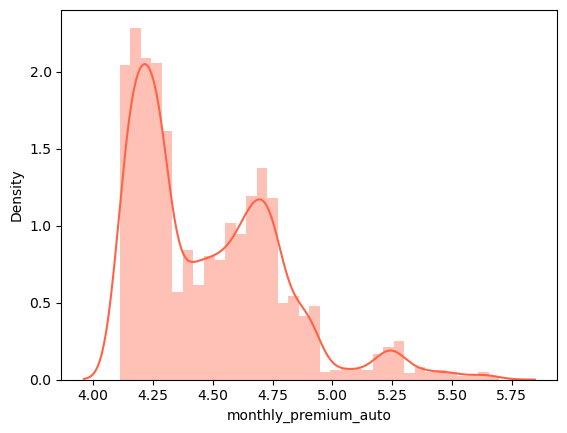

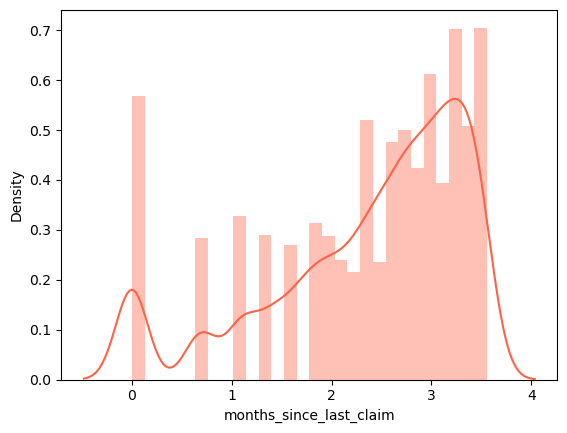

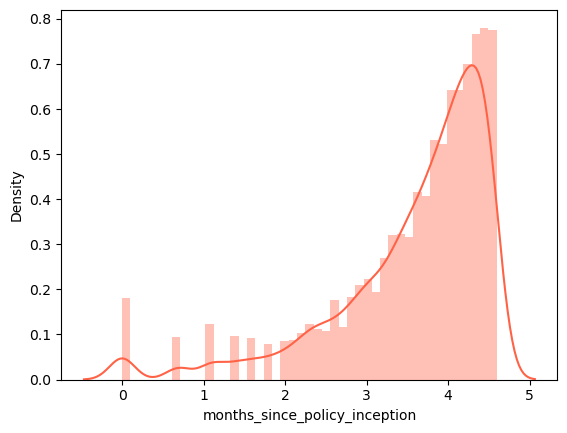

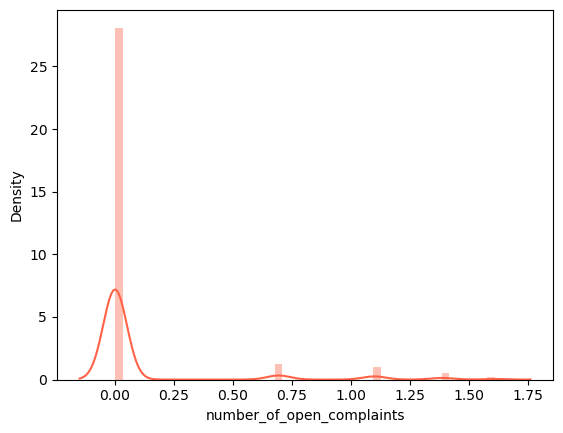

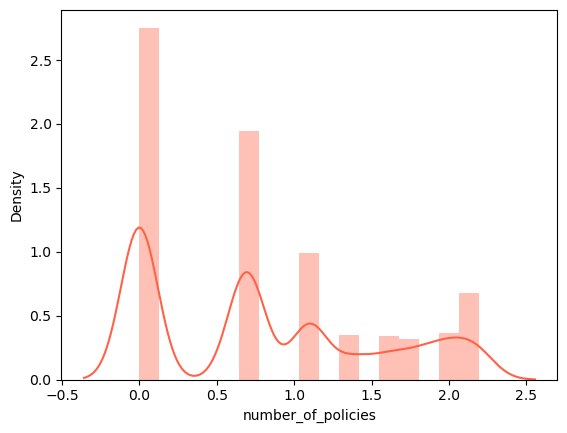

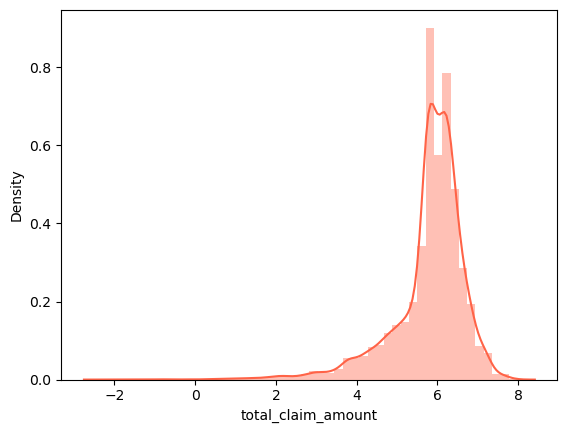

In [42]:
# Checking for distribution after log tranformation

for column in num_log_trans.columns:
    sns.distplot(num_log_trans[column], kde=True, color = 'tomato')
    plt.show()

In [43]:
numericals_df.shape

(9134, 8)

#### 3.3 Square Root Transformation

In [49]:
# making a copy of original numerical dataframe to apply square root tranformation

num_sqr = numericals_df.copy()

In [50]:
num_sqr.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [51]:
# Applaying square root transformation on data

num_sqrt = np.sqrt(num_sqr)

In [52]:
num_sqrt.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,52.569186,237.221416,8.306624,5.656854,2.236068,0.0,1.000000,19.616604
1,83.543617,0.000000,9.695360,3.605551,6.480741,0.0,2.828427,33.637255
2,113.522824,220.832516,10.392305,4.242641,6.164414,0.0,1.414214,23.800677
3,87.440619,0.000000,10.295630,4.242641,8.062258,0.0,2.645751,23.019152
4,53.044251,209.370485,8.544004,3.464102,6.633250,0.0,1.000000,11.752909


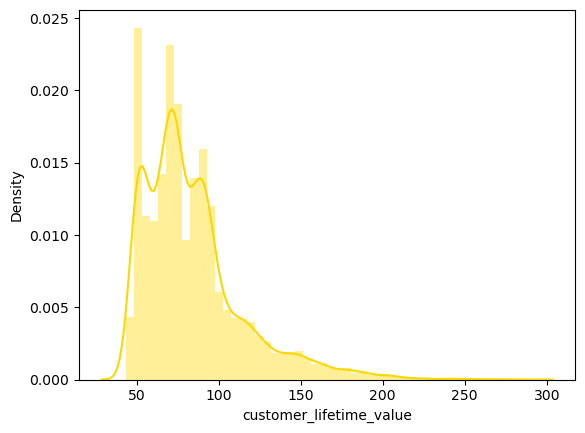

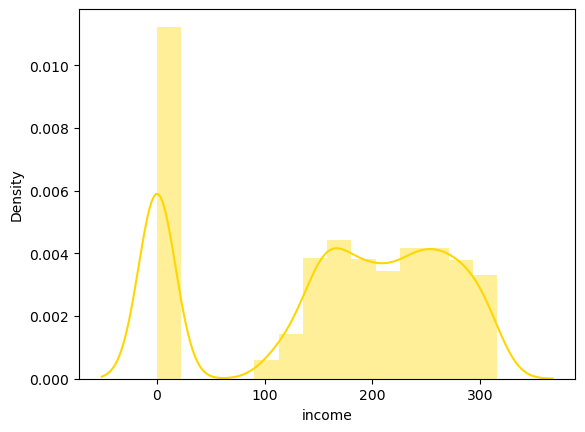

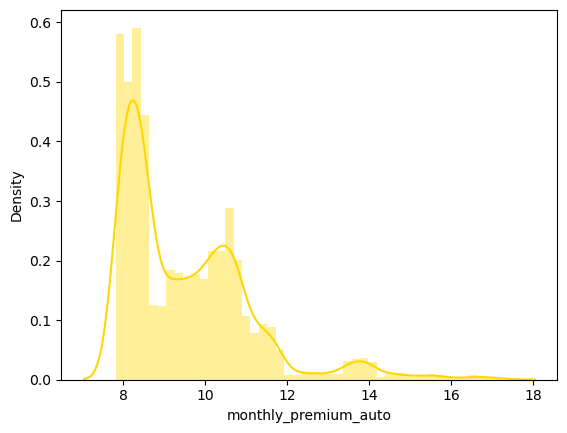

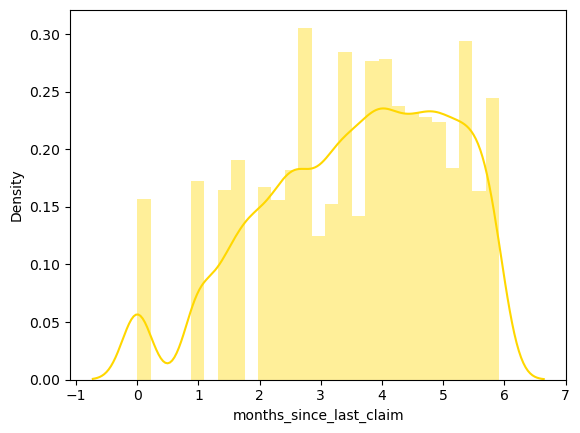

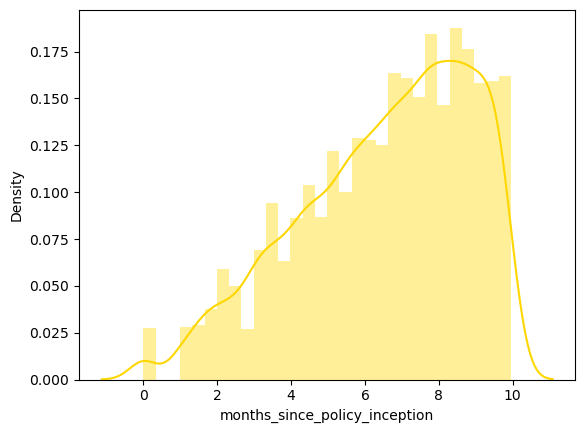

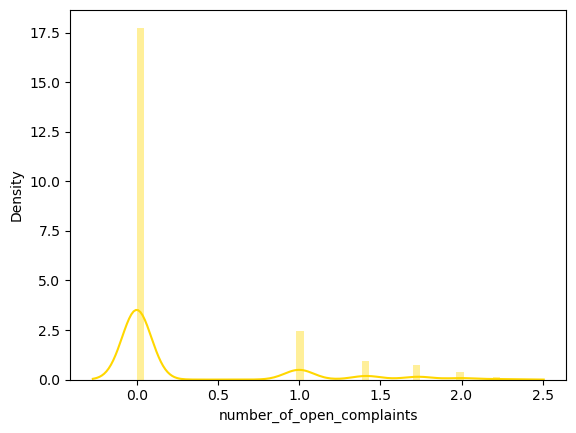

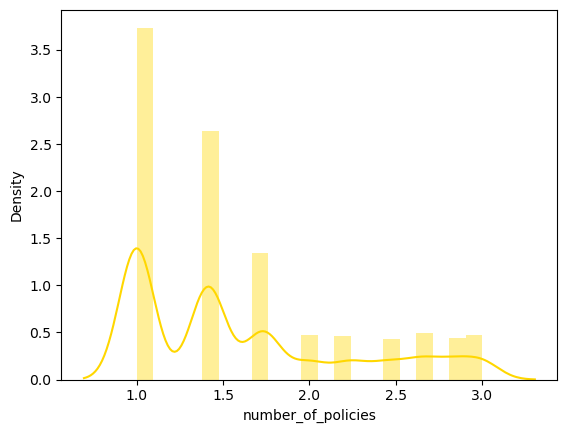

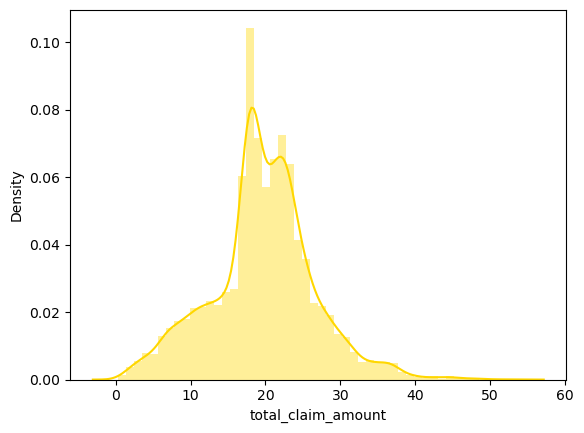

In [53]:
# Checking for distribution after log tranformation

for column in num_sqrt.columns:
    sns.distplot(num_sqrt[column], kde=True, color = 'gold')
    plt.show()

 - Done with the **BoxCox Transformation, Log Transformation and Square Root Transformation**. Looks like **BoxCox Transformation** is the best method to normalize the numerical variables and **reduce the skewness** in the distribution.